In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
import sys

sys.path.append("Mfig/")
%matplotlib nbagg
import mplp

In [64]:
df = pd.read_csv('table_judgebot.csv', sep=';')
df

,Nro,Reference,CorpusSize,Lang,Model,Repr,Metric,Min(%),Max(%),Year
0,1,\cite{aletras2016predicting},584,E,SVM,"BoW,n-grams,topics",Accuracy,62.0000,79.0000,2016
1,2,\cite{liu2017predictive},584,E,"KNN,LR,Bagging,RF,SVM",Topics,Accuracy,66.5000,87.5000,2017
2,3,\cite{medvedeva2018judicial},1942,E,SVM,TF-IDFn-grams,Accuracy,66.0000,77.0000,2018
3,4,\cite{o2019predicting},9703,E,"GB,RF,SGB,DT,QDA","n-grams,word embedings,doc2vec",Accuracy,68.8300,68.8300,2019
4,5,\cite{visentin2019predicting},684,E,"SVM,GBN,KNN,Ensambles",BoW+Spectralclustering,Accuracy,69.6000,86.1000,2019
5,6,\cite{quemy2020integrating},18420,E,"AdaBoost,Bagging,NB,DT,EnsembleExtraTree,Extra...","TF-IDF,n-grams",Accuracy,75.8600,98.3200,2020
6,7,\cite{collenette2020explainable},10,E,Abstract Dialectical Framework,Argu-ments,Accuracy,4.0000,79.0000,2020
7,8,\cite{medvedeva2020using},11532,E,SVM,TF-IDF,Accuracy,77.0000,79.0000,2020
8,1,\cite{ruger2004supreme},628,E,DT,Binary,Accuracy,68.0000,75.0000,2004
9,2,\cite{sharma2015using},120506,E,LSTM+CNN,Embeddings,Accuracy,88.0000,92.0500,2015


In [65]:
df.columns

Index(['Nro', 'Reference', 'CorpusSize', 'Lang', 'Model', 'Repr', 'Metric',
       'Min(%)', 'Max(%)', 'Year'],
      dtype='object')

In [66]:
df.CorpusSize.unique

<bound method Series.unique of 0         584
1         584
2        1942
3        9703
4         684
5       18420
6          10
7       11532
8         628
9      120506
10      28000
11      27492
12        430
13      39157
14       1884
15        430
16      50000
17          0
18       3072
19        100
20     123361
21     120506
22        210
23      60000
24    5700000
25    1200000
26      41418
27         38
28     188294
29         86
30    1500000
31       1562
32        503
33       5990
34     500000
35     545760
36       4762
37     981112
38      53397
39      16040
40      30311
41       7904
42      34816
43     695418
44        100
Name: CorpusSize, dtype: int64>

In [67]:
df_max = df.groupby(['Year'])[['CorpusSize']].max()

In [68]:
df_max

,CorpusSize
Year,
2004,628
2010,210
2015,120506
2016,584
2017,500000
2018,5700000
2019,41418
2020,1500000
2020,10


In [69]:
df_mean = df.groupby(['Year'])[['CorpusSize']].mean()

In [70]:
df_mean

,CorpusSize
Year,
2004,6.280000e+02
2010,2.100000e+02
2015,1.205060e+05
2016,5.840000e+02
2017,1.189148e+05
2018,1.361769e+06
2019,1.132100e+04
2020,3.376795e+05
2020,1.000000e+01


In [71]:
df_stat = df_max.merge(df_mean, left_index=True, right_index=True)
df_stat.columns = ['CorpusSize','Corpus avg']
df_stat

,CorpusSize,Corpus avg
Year,,
2004,628,6.280000e+02
2010,210,2.100000e+02
2015,120506,1.205060e+05
2016,584,5.840000e+02
2017,500000,1.189148e+05
2018,5700000,1.361769e+06
2019,41418,1.132100e+04
2020,1500000,3.376795e+05
2020,10,1.000000e+01


In [72]:
df_stat.index.tolist()

['2004',
 '2010',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2020\xa0',
 '2021',
 '2022']

In [85]:
df_stat['CorpusSize'].tolist()

[628, 210, 120506, 584, 500000, 5700000, 41418, 1500000, 10, 123361, 120506]

In [86]:
df_stat['Corpus avg'].tolist()

[628.0,
 210.0,
 120506.0,
 584.0,
 118914.8,
 1361768.6666666667,
 11321.0,
 337679.5,
 10.0,
 25755.14285714286,
 60504.5]

<IPython.core.display.Javascript object>


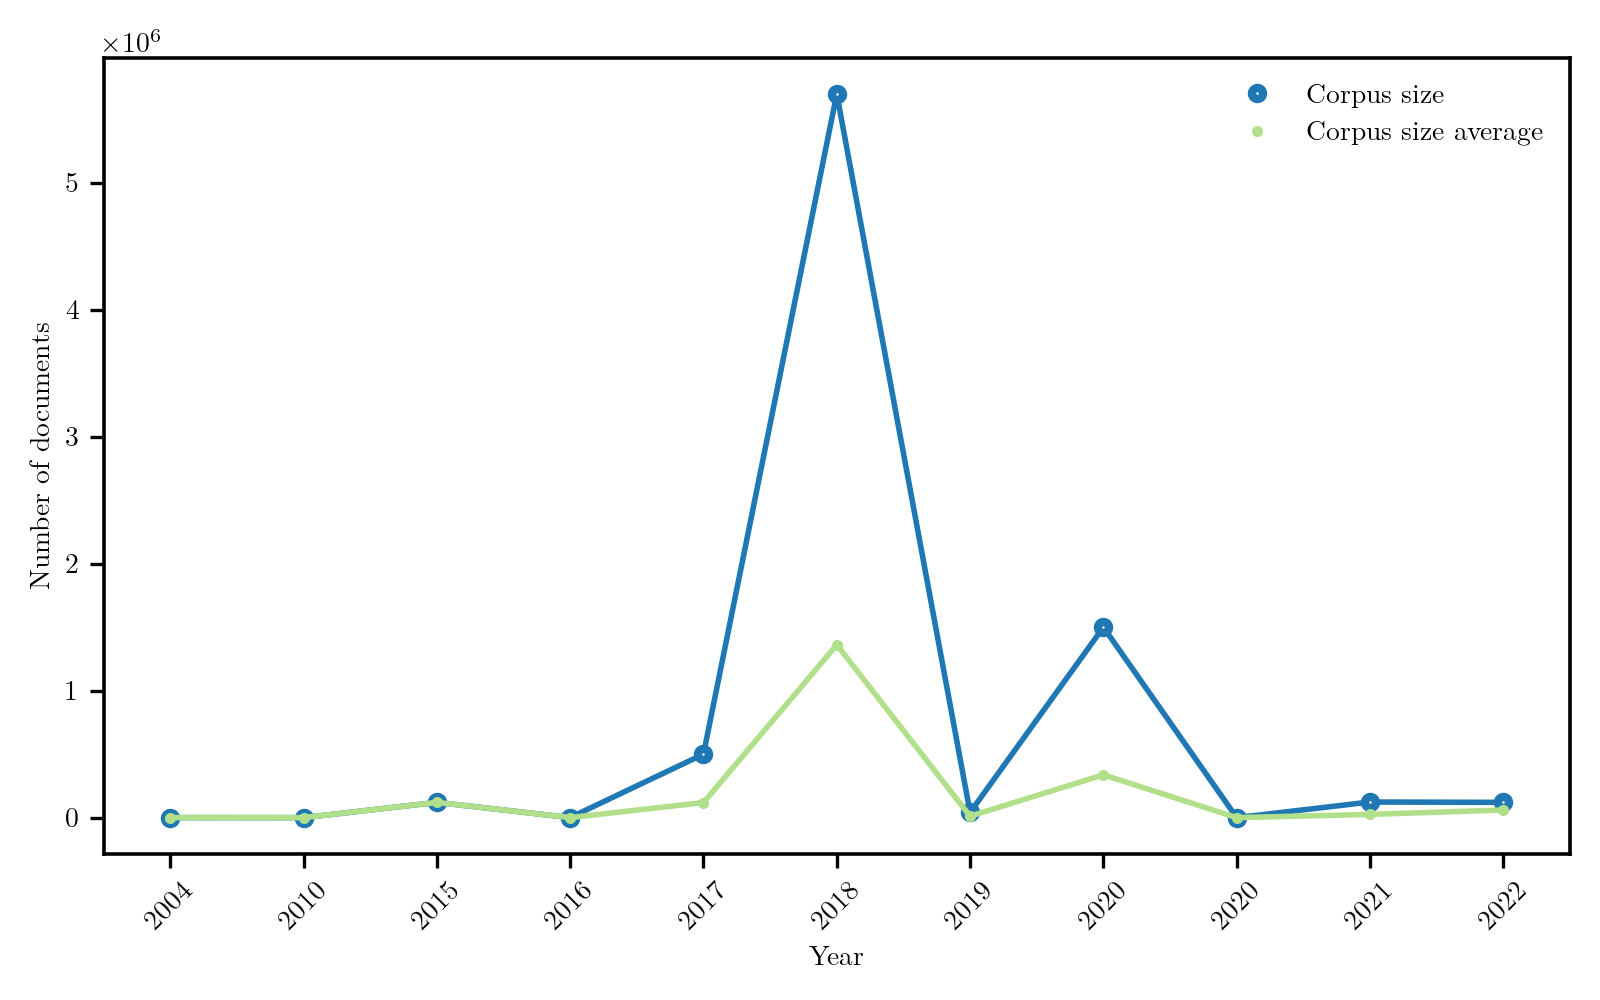

In [121]:
mfig = mplp.Mfig(format='double', formatting='landscape')
fig, ax = mfig.subplots()
colors = mfig.get_color_cycle()

x = df_stat.index.tolist()
s = df_stat['CorpusSize'].tolist()

ax.plot(x, s, lw=2, color=colors[1])
ax.plot(x,s,'o',
        ms=4,
        markerfacecolor='white',
        markeredgecolor=colors[1],
        markeredgewidth=3,
        label="Corpus size")

s = df_stat['Corpus avg'].tolist()
ax.plot(x, s, lw=2, color=colors[2])
ax.plot(x,s,'o',
        ms=2,
        markerfacecolor='white',
        markeredgecolor=colors[2],
        markeredgewidth=2,
        label="Corpus size average")


ax.set_xticks(x)
ax.set_xticklabels(x)

ax.set_xlabel('Year')
ax.set_ylabel('Number of documents')
plt.xticks(rotation = 45)
#ax.set_xlim(0, 2300)
#ax.set_ylim(0, 21)
#ax.set_ylabel('EMA')
ax.legend(frameon=False)
fig.set_size_inches(8, 5)
mfig.savefig('corpus_size', dpi=250)

In [88]:
df_lang = df.groupby('Lang')[['Reference']].count()
df_lang

,Reference
Lang,
C,6
E,24
F,3
Fa,1
G,2
I,2
P,2
Ph,1
S,1


/opt/anaconda3/envs/dm/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/Users/hugoalatristasalas/Downloads/survey_judgebot/Mfig/mplp/mfig.py:274: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
/Users/hugoalatristasalas/Downloads/survey_judgebot/Mfig/mplp/mfig.py:197: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  self.fig, self.ax = plt.subplots(nrows,


<IPython.core.display.Javascript object>


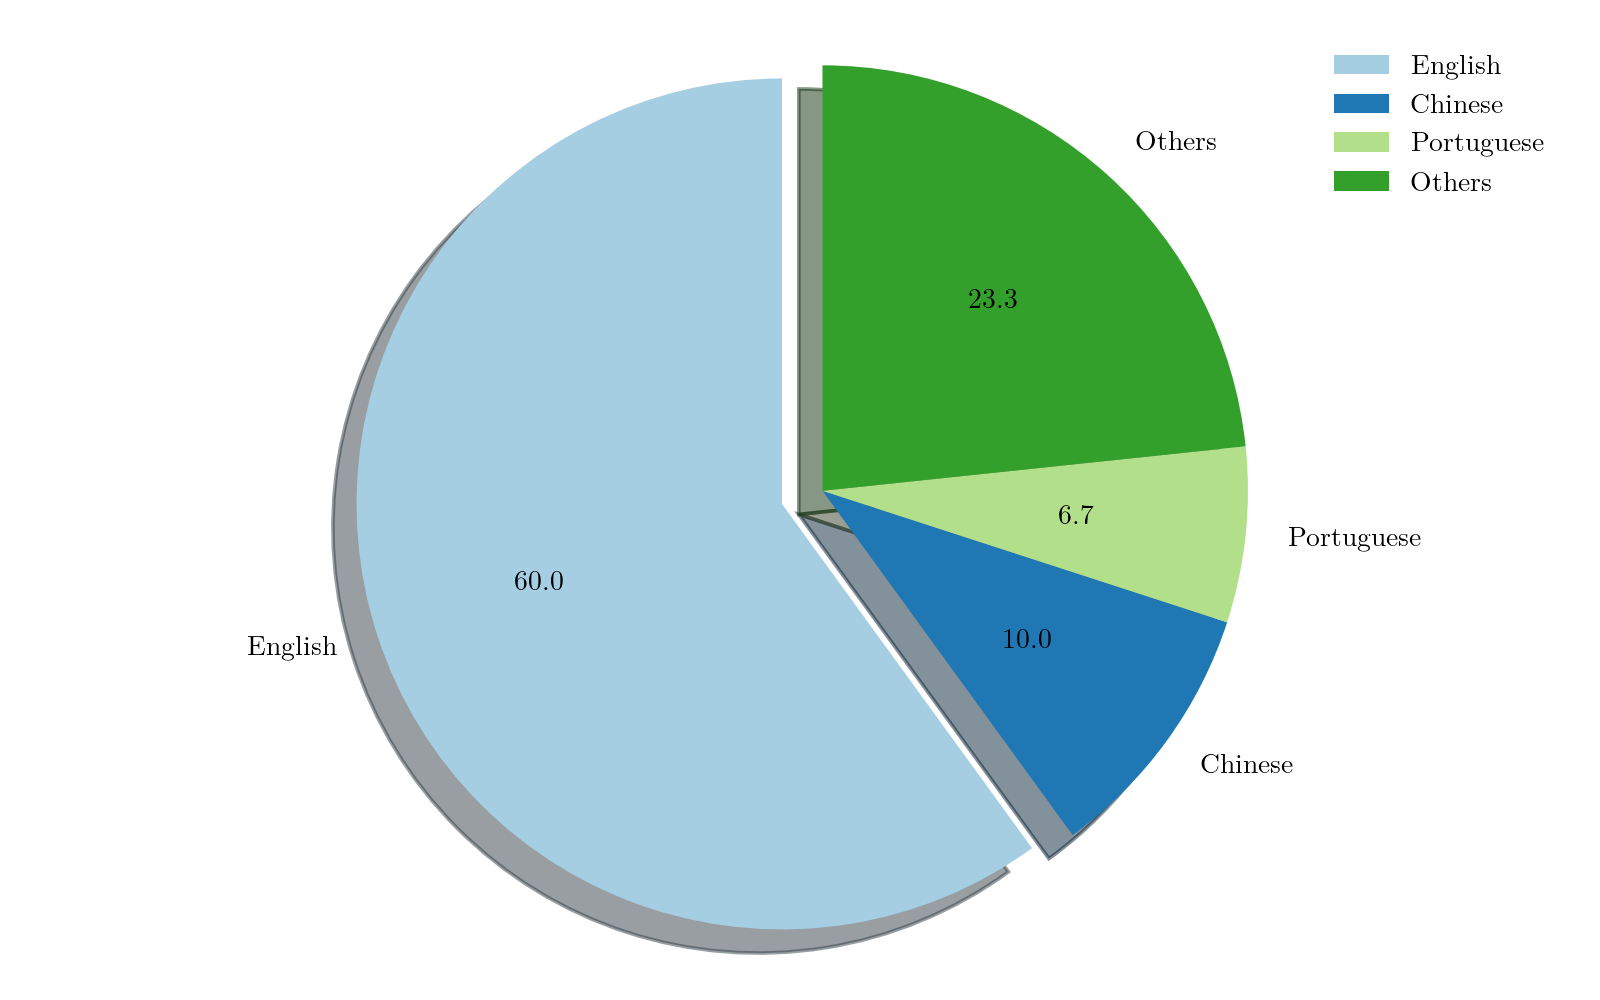

In [125]:
mfig = mplp.Mfig(format='double', formatting='landscape')
fig, ax = mfig.subplots()
colors = mfig.get_color_cycle()

sizes = [18,3,2,7]
labels = ['English','Chinese','Portuguese','Others']
explode = [0.1, 0, 0, 0]

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.legend(frameon=False)
fig.set_size_inches(8, 5)
mfig.savefig('pie', dpi=250)

In [90]:
 df[['Model','Year']].to_csv('models_has.csv',sep=';')

<IPython.core.display.Javascript object>


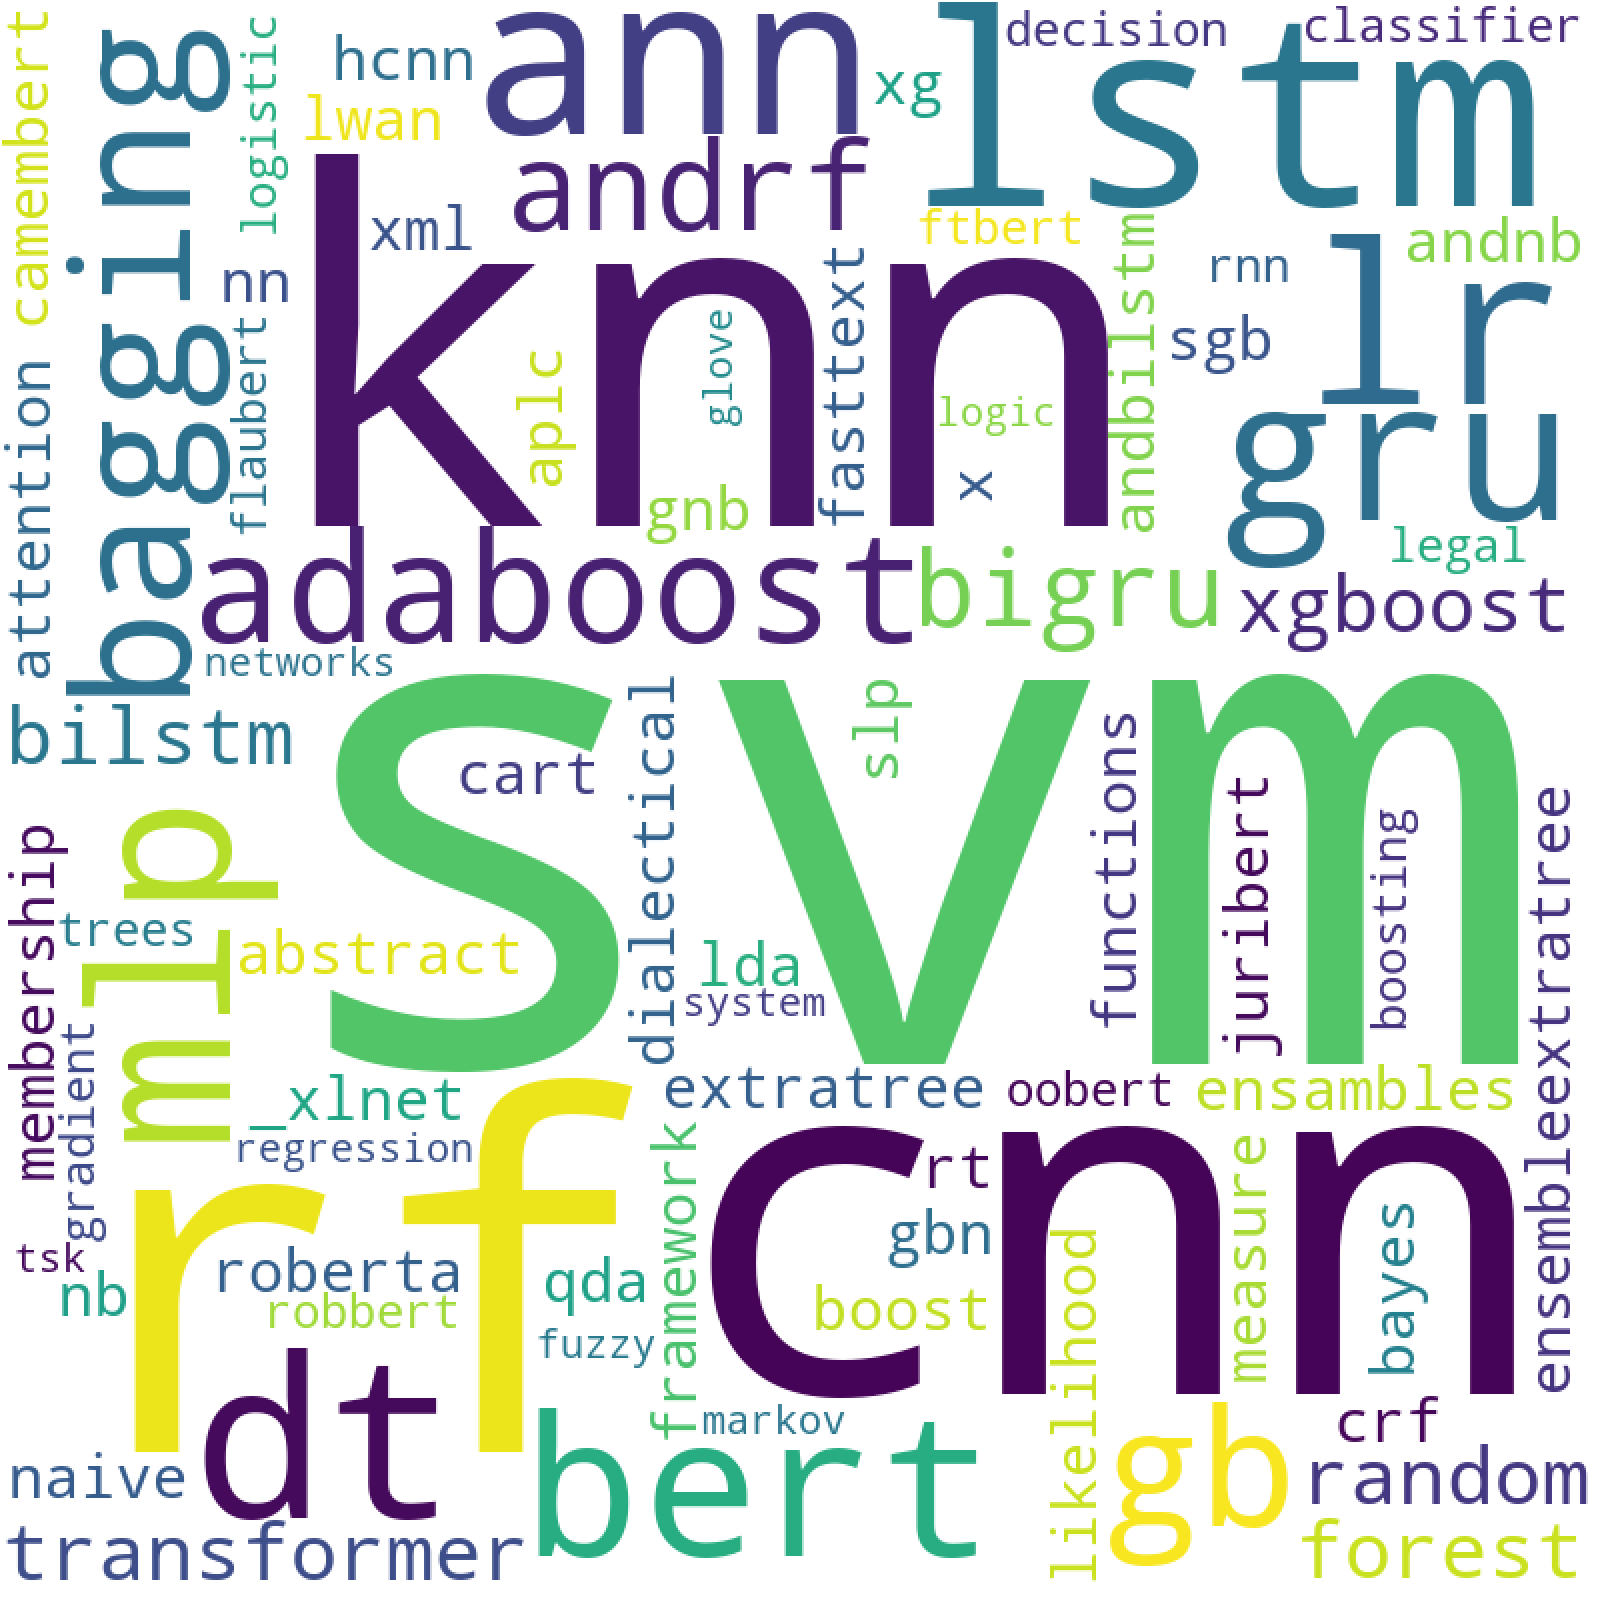

In [126]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in  df['Model'].tolist():
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('model', dpi=250)
plt.show()

In [92]:
comment_words

'svm knn,lr,bagging,rf,svm svm gb,rf,sgb,dt,qda svm,gbn,knn,ensambles adaboost,bagging,nb,dt,ensembleextratree,extratree,gb,knn,svm,nn,andrf abstract dialectical framework svm dt lstm+cnn rf svm,rf svm gru,lstm,andbilstm ann mlp roberta,rf,mlp,bigru-lwan,attention xml,aplc\\_xlnet,x-transformer hcnn xg-boost,ann,svm,andrf membership functions juribert cnn,lstm ann svm,ann svm,fasttext,cnn, cnn likelihood measure knn svm,lr,rf,knn,slp,mlp svm,knn,cart,andnb cnn/lstm lr,lda,knn,rt,gnb,svm camembert,bilstm-crf naive bayes classifier rf cnn,lstm,rnn svm,dt,xgboost,bert,gru,lstm,cnn flaubert transformers,bert,robbert svm oobert,ftbert,legal-bert,bilstm,gru,lr,svm adaboost,decision trees,gradient boosting,random forests,svm,xgboost logistic regression,svm,random forest,bigru,glove markov logic networks tsk fuzzy system '

<IPython.core.display.Javascript object>


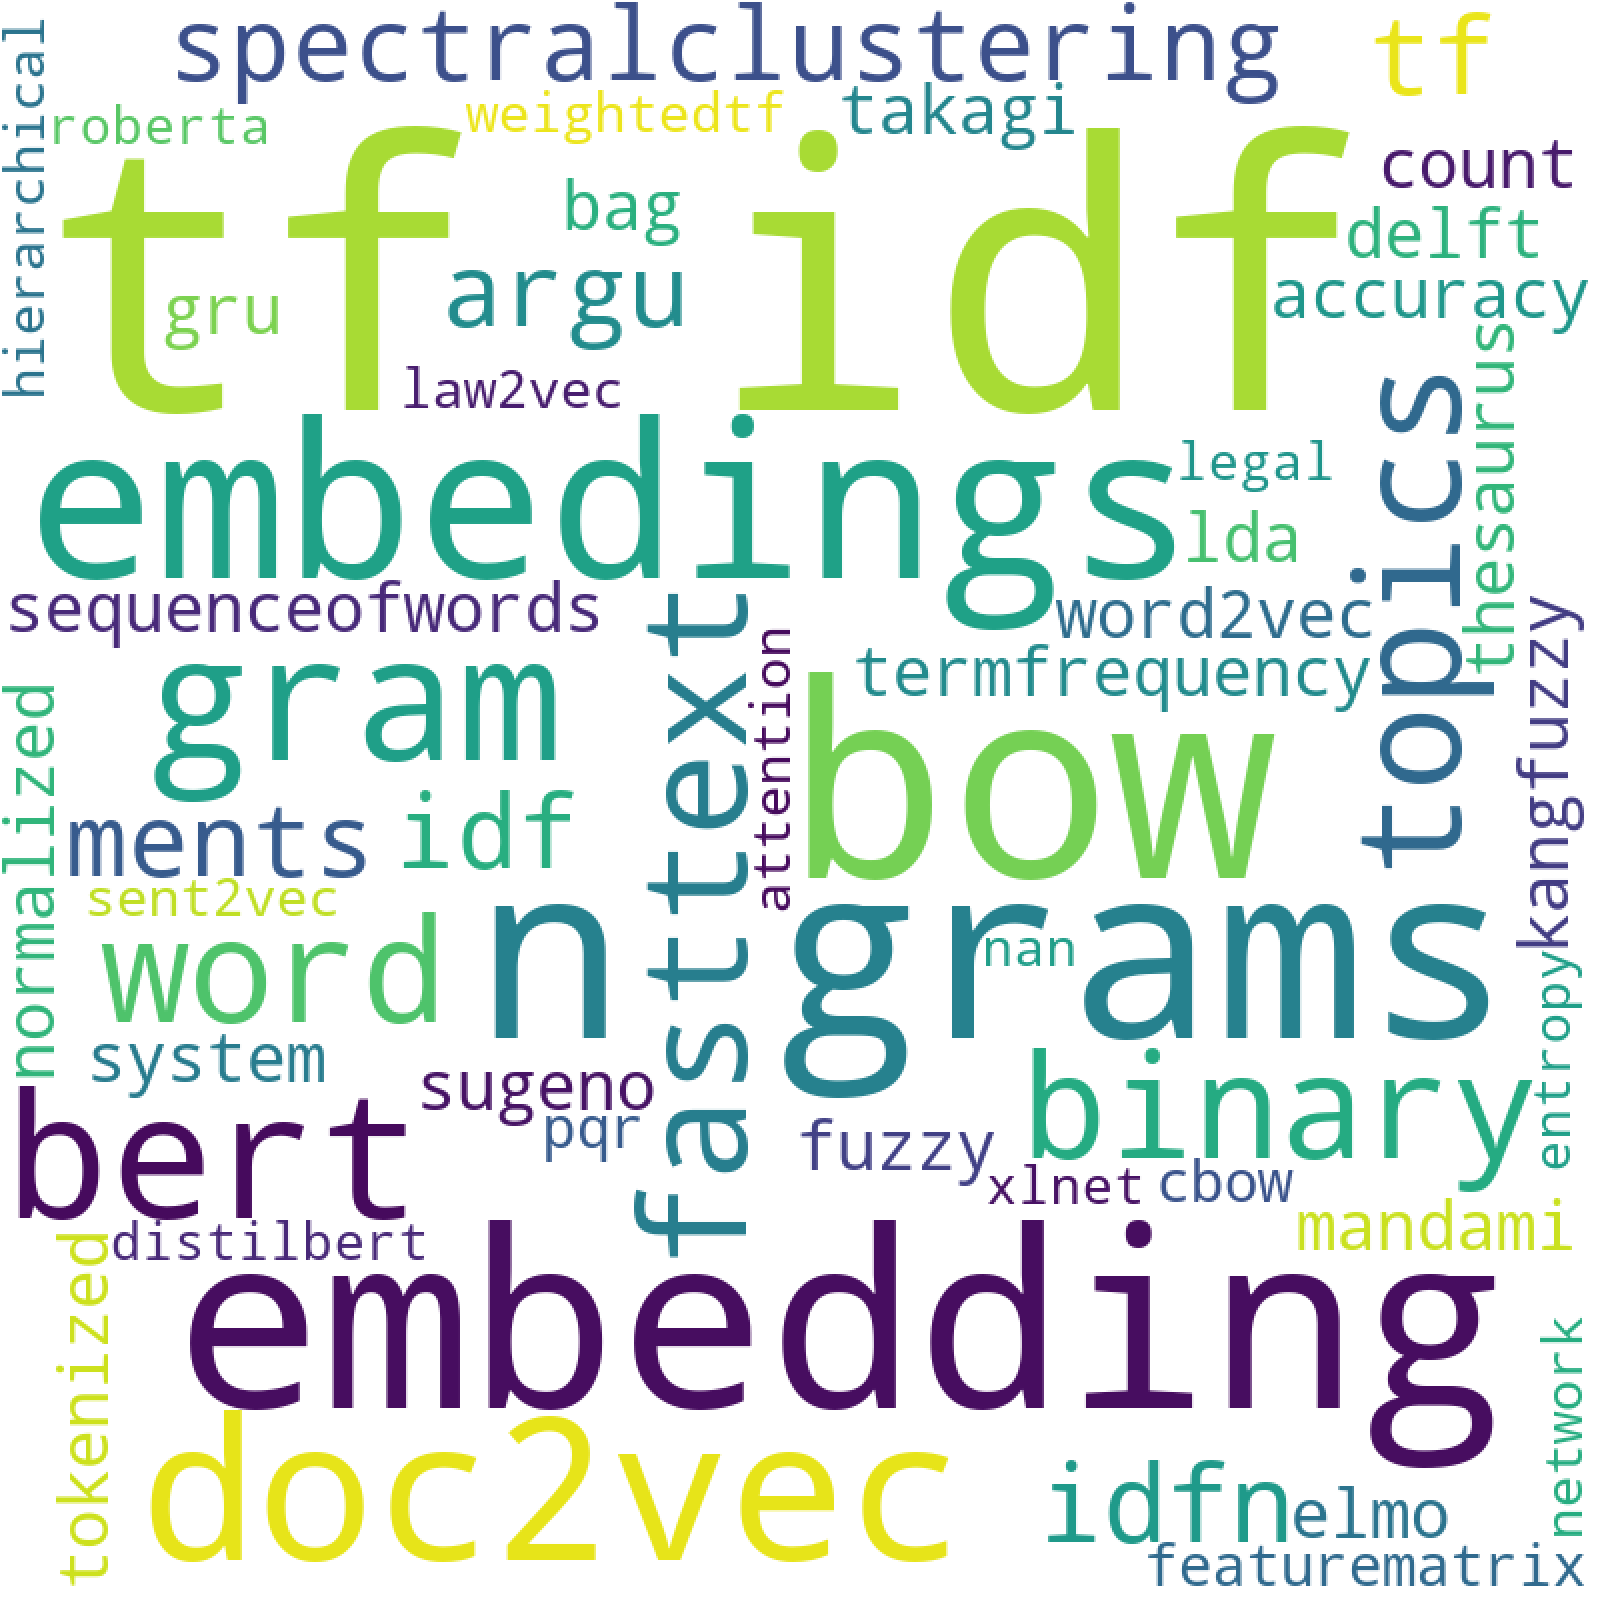

In [127]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in  df['Repr'].tolist():
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('representation', dpi=250)
plt.show()

<IPython.core.display.Javascript object>


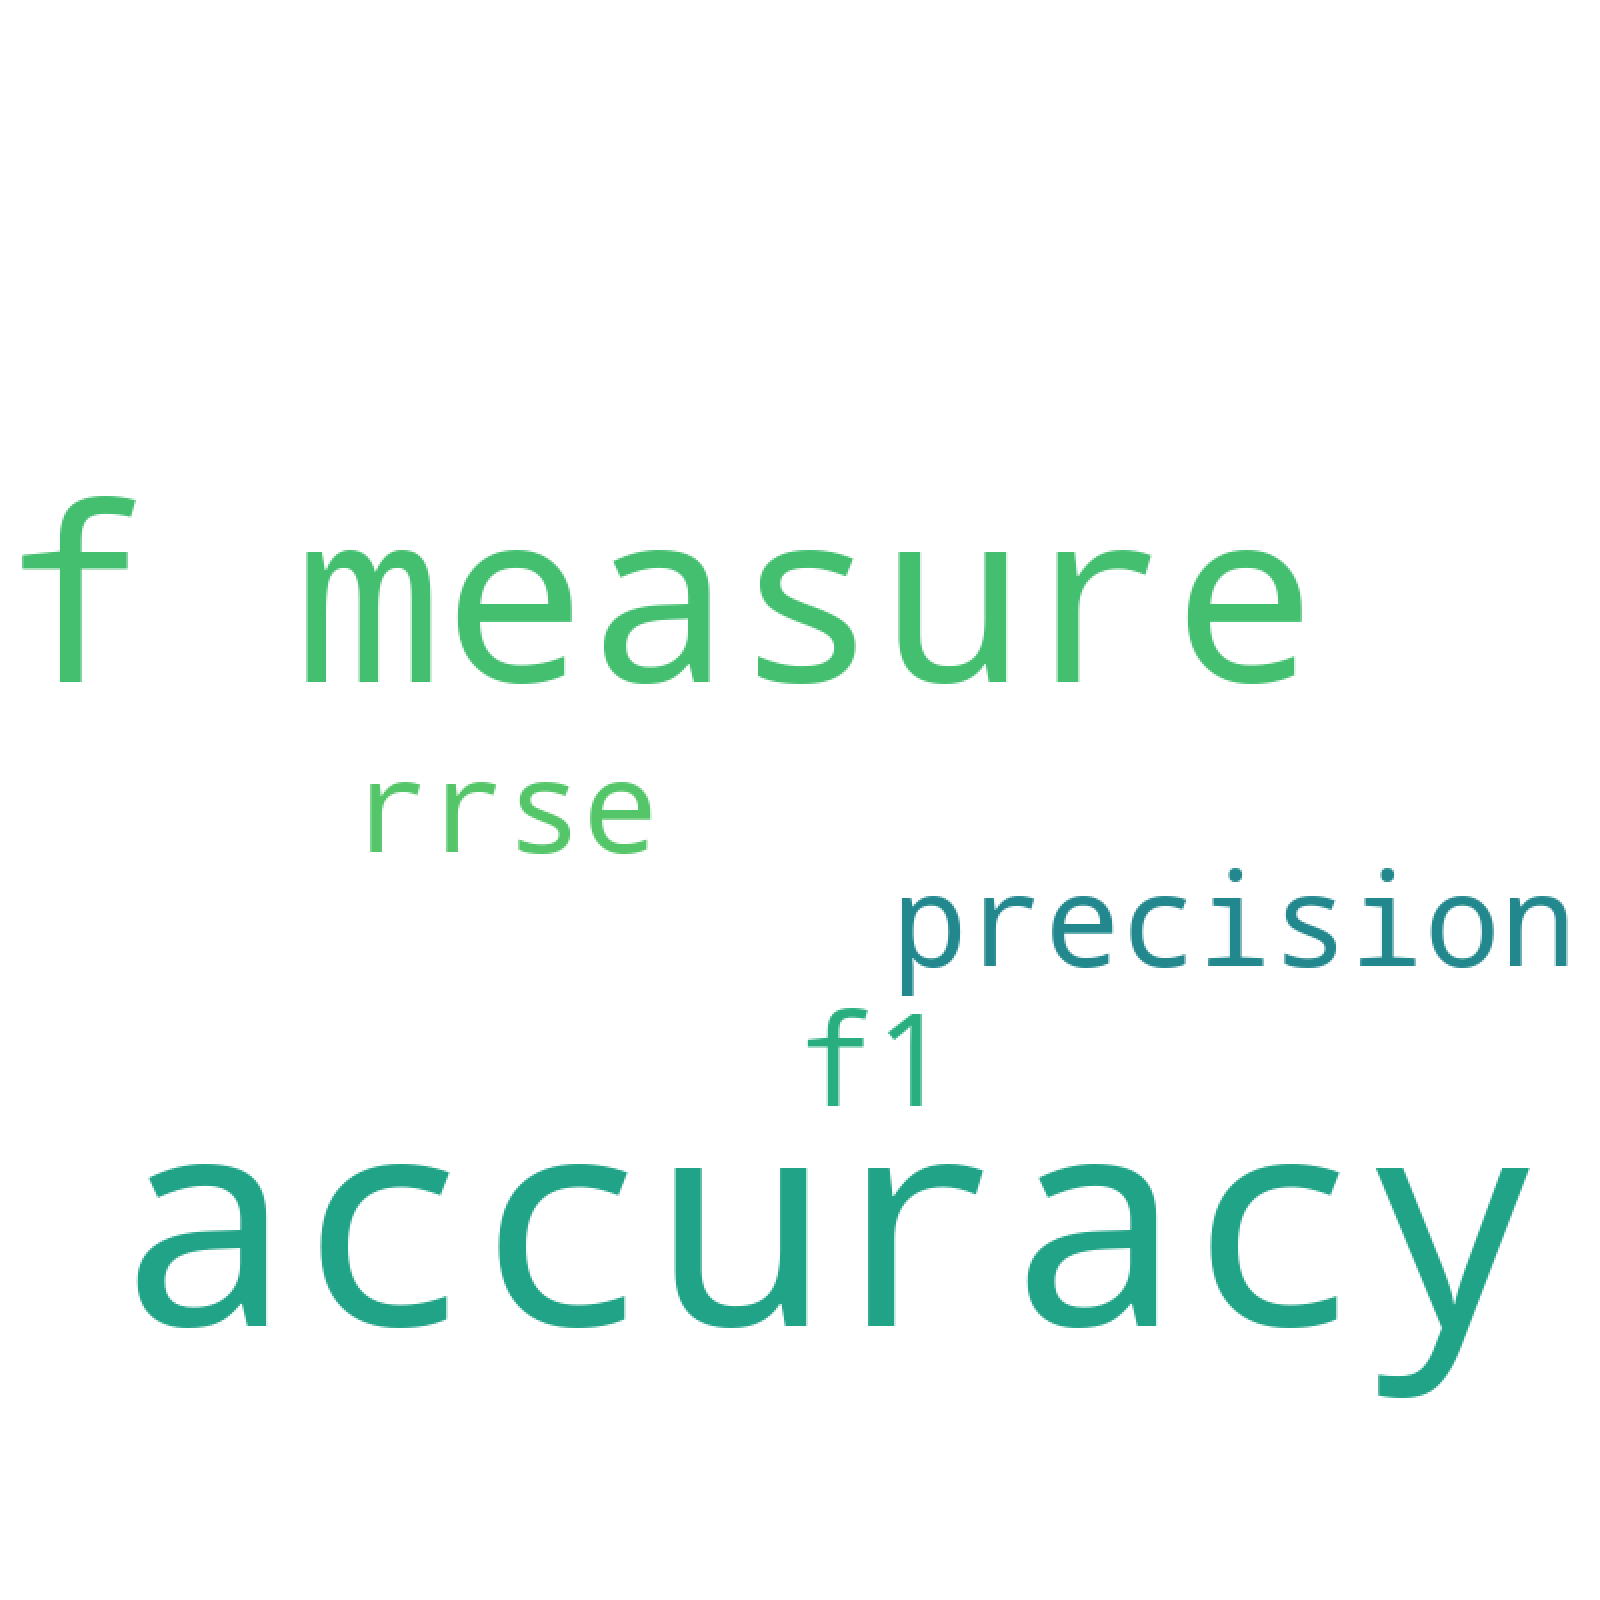

In [128]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in  df['Metric'].tolist():
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('metric', dpi=250)
plt.show()

In [96]:
df_mean_max = df.groupby(['Year'])[['Max(%)']].mean()
df_mean_min = df.groupby(['Year'])[['Min(%)']].mean()

In [97]:
df_performance = df_mean_max.merge(df_mean_min, left_index=True, right_index=True)
df_performance.columns = ['Max','Min']
df_performance

,Max,Min
Year,,
2004,75.000000,68.000000
2010,94.000000,67.000000
2015,92.050000,88.000000
2016,79.000000,62.000000
2017,79.582000,66.970000
2018,84.271667,71.153333
2019,76.354000,71.362500
2020,89.627500,67.793750
2020,79.000000,4.000000


<IPython.core.display.Javascript object>


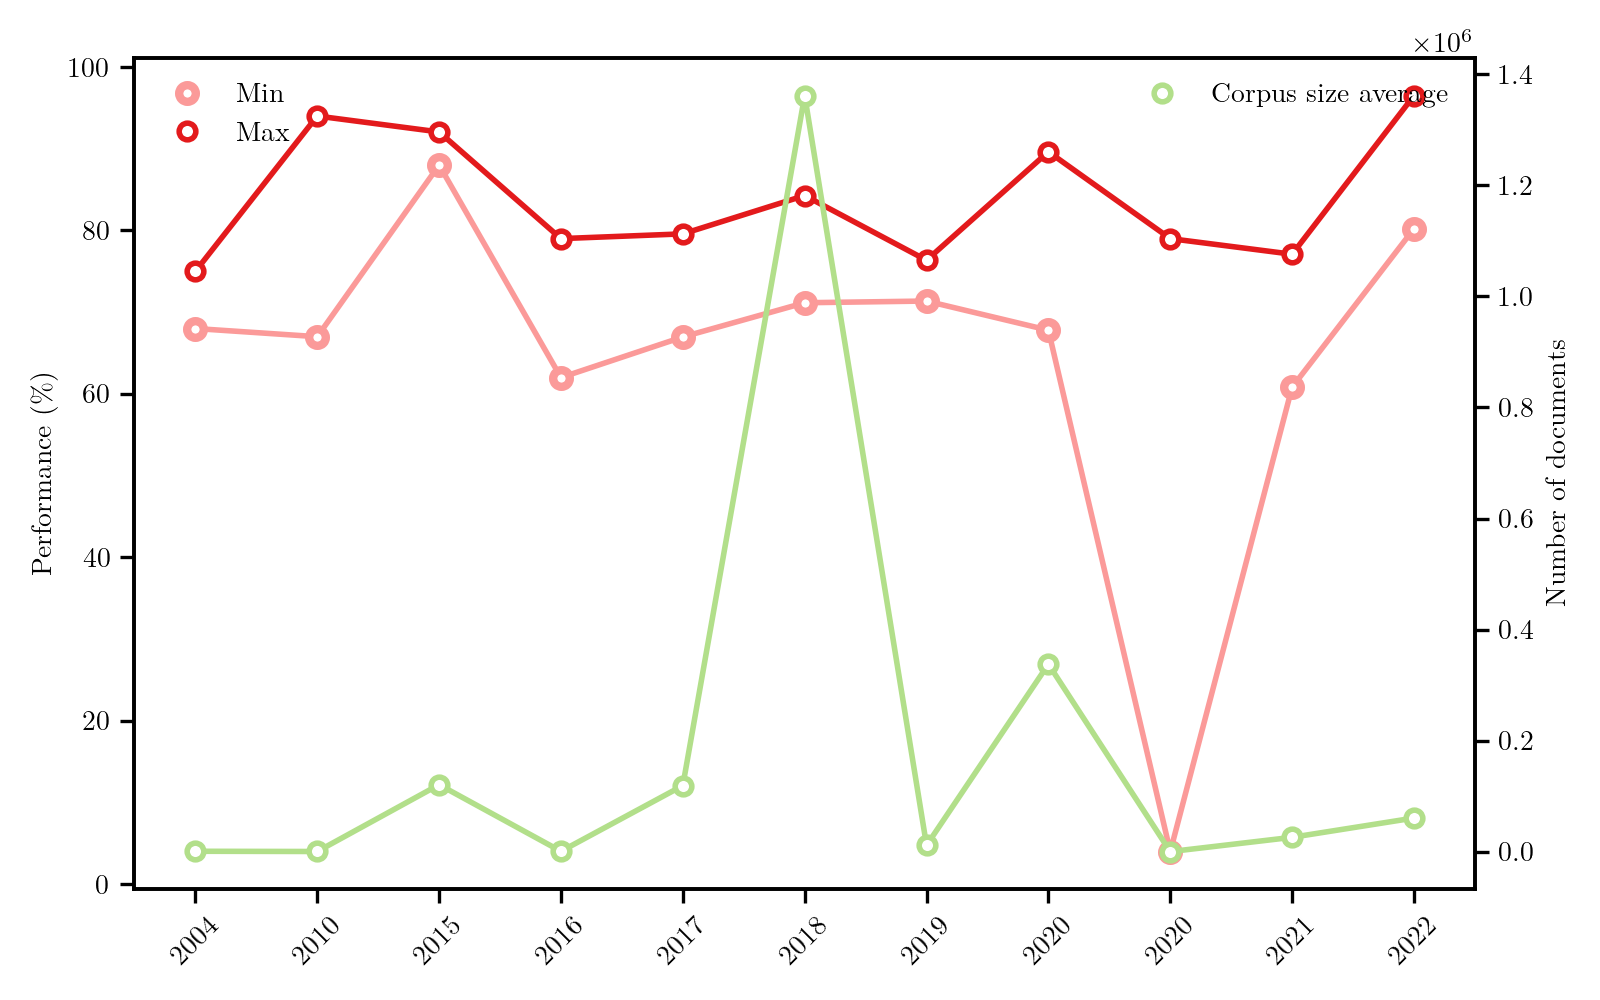

In [129]:
mfig = mplp.Mfig(format='double', formatting='landscape')
fig, ax1 = mfig.subplots()
colors = mfig.get_color_cycle()

x = df_stat.index.tolist()
s = df_performance['Min'].tolist()

ax1.plot(x, s, lw=2, color=colors[4])
ax1.plot(x,s,'o',
        ms=6,
        markerfacecolor='white',
        markeredgecolor=colors[4],
        markeredgewidth=3,
        label="Min")

s = df_performance['Max'].tolist()
ax1.plot(x, s, lw=2, color=colors[5])
ax1.plot(x,s,'o',
        ms=6,
        markerfacecolor='white',
        markeredgecolor=colors[5],
        markeredgewidth=2,
        label="Max")

ax1.set_ylabel('Performance (\%)')
plt.xticks(rotation = 45)


ax2 = ax1.twinx()

s = df_stat['Corpus avg'].tolist()
ax2.plot(x, s, lw=2, color=colors[2])
ax2.plot(x,s,'o',
        ms=6,
        markerfacecolor='white',
        markeredgecolor=colors[2],
        markeredgewidth=2,
        label="Corpus size average")



ax2.set_xticks(x)
ax2.set_xticklabels(x)

ax2.set_xlabel('Year')
ax2.set_ylabel('Number of documents')
ax1.legend(frameon=False, loc ='upper left')
ax2.legend(frameon=False, loc ='upper right')
fig.set_size_inches(8, 5)
mfig.savefig('performance', dpi=250)

In [99]:
df.sort_values(by=['Year'])

,Nro,Reference,CorpusSize,Lang,Model,Repr,Metric,Min(%),Max(%),Year
8,1,\cite{ruger2004supreme},628,E,DT,Binary,Accuracy,68.0000,75.0000,2004
22,1,\cite{chou2010text},210,C,ANN,TF-IDF,precision,67.0000,94.0000,2010
9,2,\cite{sharma2015using},120506,E,LSTM+CNN,Embeddings,Accuracy,88.0000,92.0500,2015
0,1,\cite{aletras2016predicting},584,E,SVM,"BoW,n-grams,topics",Accuracy,62.0000,79.0000,2016
34,2,\cite{chen2017can},500000,E,RF,featurematrix,Accuracy,75.0000,82.0000,2017
1,2,\cite{liu2017predictive},584,E,"KNN,LR,Bagging,RF,SVM",Topics,Accuracy,66.5000,87.5000,2017
10,3,\cite{katz2017general},28000,E,RF,Termfrequency,Accuracy,70.2000,71.9000,2017
33,1,\cite{waltl2017predicting},5990,G,Naive Bayes classifier,Normalized Thesaurus,F-measure,53.0000,58.0000,2017
23,2,\cite{luo2017learning},60000,C,"SVM,ANN",Embedding,F-measure,70.1500,98.5100,2017
24,3,\cite{xiao2018cail2018},5700000,C,"SVM,FastText,CNN,","TF-IDF,n-grams,embeddings",Accuracy,94.3000,97.6000,2018


## Number of works

In [101]:
works = df.groupby('Year')[['Reference']].count()

<IPython.core.display.Javascript object>


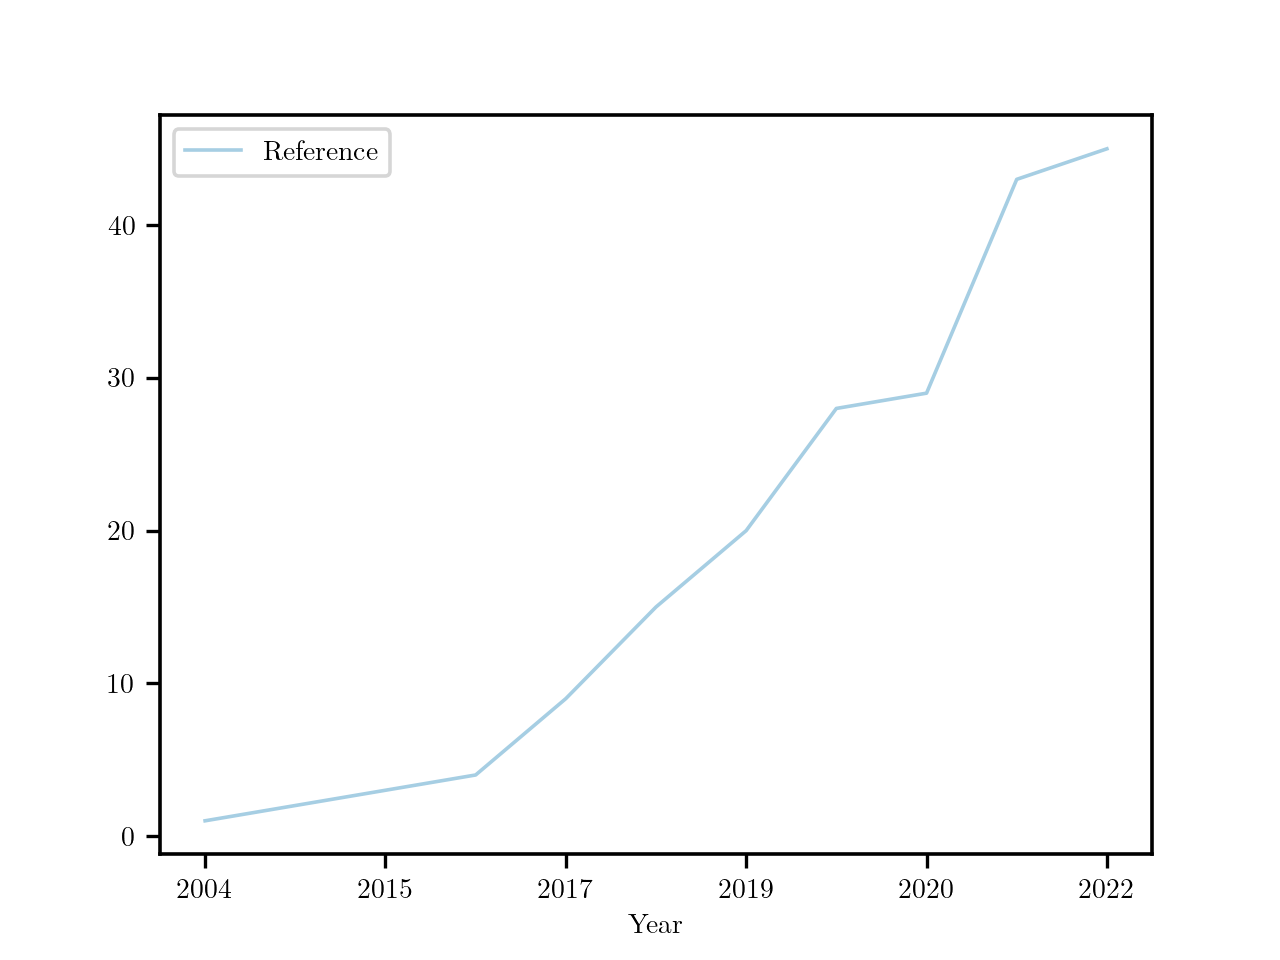

<AxesSubplot:xlabel='Year'>

In [102]:
works.cumsum().plot()

In [103]:
df_models = pd.read_csv('models.csv', sep=';')
df_models

,Model,IA,Year
0,DT,ML,2004
1,SVM,ML,2016
2,RF,ML,2017
3,KNN,ML,2017
4,LR,ML,2017
...,...,...,...
80,GRU,DL,2022
81,LSTM,DL,2022
82,CNN,DL,2022
83,LSTM,DL,2022


In [104]:
df_models.groupby('IA')['Model'].count()

IA
DL    25
ML    60
Name: Model, dtype: int64

<IPython.core.display.Javascript object>


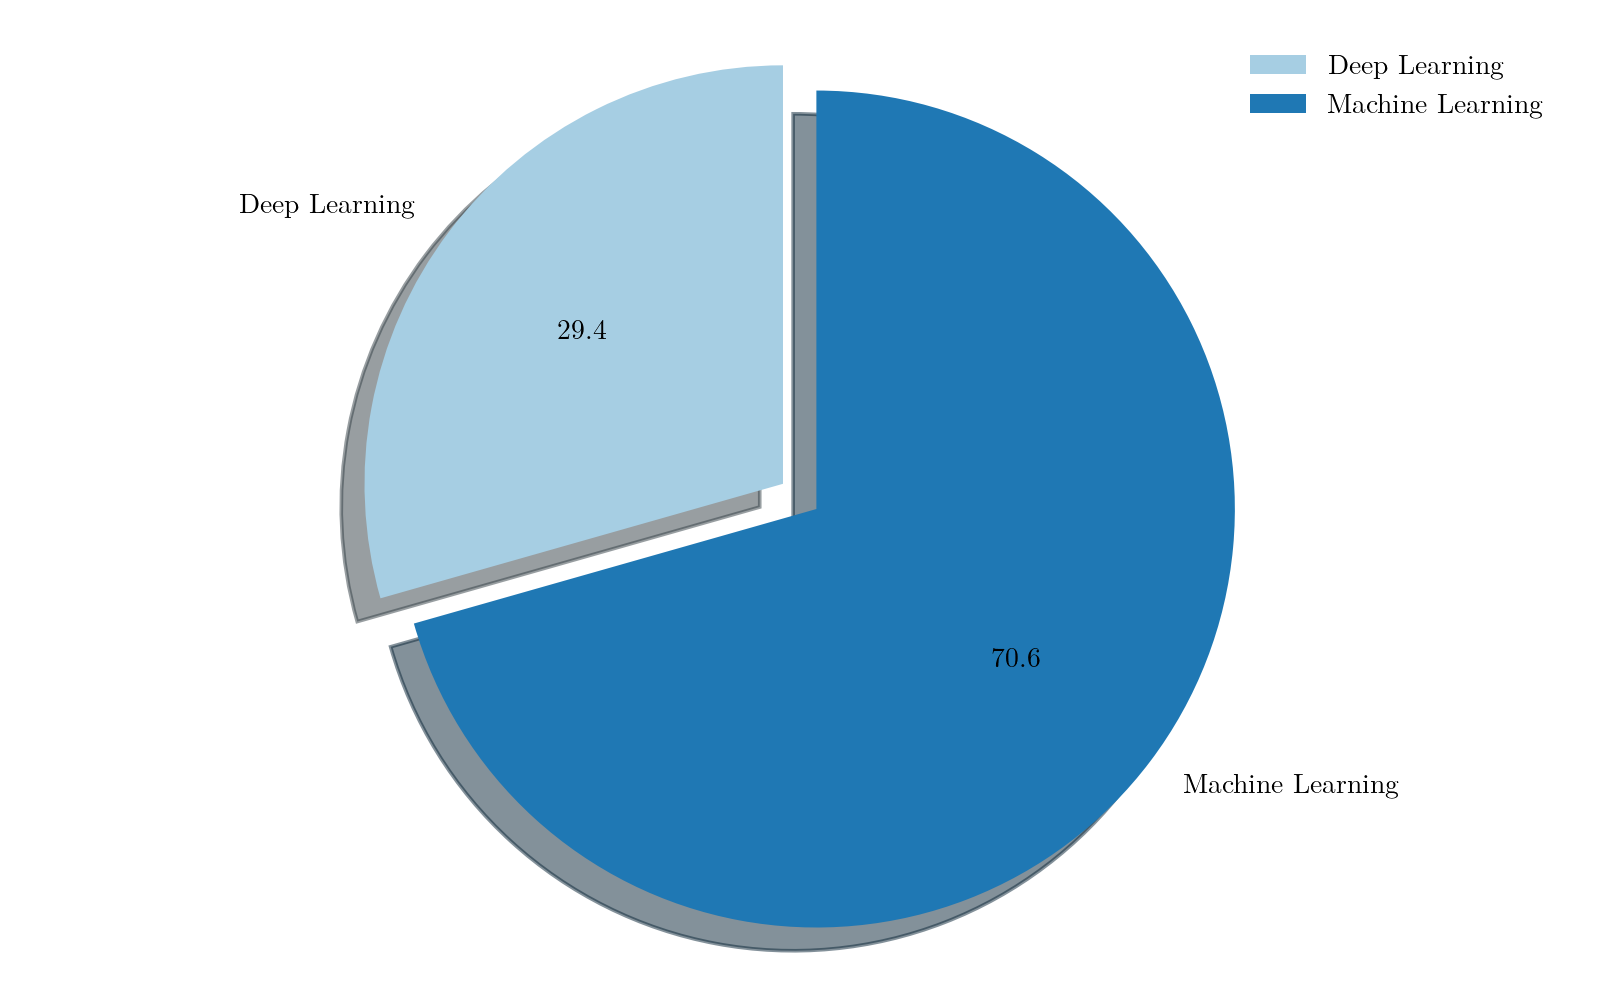

In [130]:
mfig = mplp.Mfig(format='double', formatting='landscape')
fig, ax = mfig.subplots()
colors = mfig.get_color_cycle()

sizes = [25,60]
labels = ['Deep Learning','Machine Learning']
explode = [0.1, 0]

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.legend(frameon=False)
fig.set_size_inches(8, 5)
mfig.savefig('pie_models', dpi=250)

In [131]:
df_models.groupby(['Year','IA']).count().to_csv('models2.csv',sep=';')

KeyError: 'Year'

In [90]:
df_models2 = pd.read_csv('models2.csv', sep=';')
df_models2

,Year,IA,Model
0,2004,ML,1
1,2016,ML,1
2,2017,ML,9
3,2018,DL,2
4,2018,ML,4
5,2019,ML,6
6,2020,ML,23
7,2021,DL,15
8,2021,ML,13
9,2022,DL,8


In [105]:
df.groupby('Metric').agg({'Min':min,'Max':max}).plot.barh()

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Metric'>

,Nro.,Reference,Corpus size,Lang.,Model,Repr.,Metric,Min(%),Max,Year
0,1,citeruger2004supreme,628,E,Decision trees,Binary,accuracy,68.00,75.00,2004
1,2,citekatz2017general,28000,E,Random Forest,Term frequency,accuracy,70.20,71.90,2017
2,3,citesert2021using,430,E,MLP,"Embedings, TFIDF, BoW",f-measure,60.00,98.70,2021
3,4,citemumcuouglu2021natural,39157,T,"GRU, LSTM, and BILSTM",TFIDF,f-measure,56.00,87.00,2021
4,5,citemunoz2021model,1884,S,ANN,Binary,accuracy,61.00,85.00,2021
5,6,citesong2021multi,50000,E,"RoBERTa, RF, MLP, BIGRU-LWAN, AttentionXML, AP...",Sequence of words,f-measure,74.50,80.20,2021
6,7,citesharma2021predicting,3072,E,"xg-Boost, ANN, SVM, and RF",TFIDF,f-measure,60.00,76.00,2021
7,8,citevirtucio2018predicting,27492,Ph,"SVM, RF","BoW, n-grams",Accuracy,55.00,59.00,2018
8,9,citealghazzawi2022efficient,120506,E,"CNN, LSTM",embedding,F-measure,79.00,93.00,2022
9,10,citebagherian2021two,100,F,member ship functions,"Mandami Fuzzy system, Takagi–Sugeno–Kang fuzzy",Accuracy,59.00,74.00,2021
